In [ ]:
sam

## Utils

In [1]:
# execute this cell when you want to free up the memory!
import gc
import pandas as pd
gc.collect()

0

## Step 1: Data Preprocessing

In [1]:
import matplotlib.pyplot as plt
from modules import Annotations, Samples, Sequencing
import glob

samples = Samples.Samples()
samples.load_data(glob.glob('data/*.txt'))

annotations = Annotations.Annotations()
annotations.load_annotations("data/GSE124439_family.xml")

sequencing = Sequencing.Sequencing(samples=samples, annotations=annotations)

Annotations loaded. Action accomplished with 0 errors inside 184 files.


In [2]:
annotations.get_annotations()

,cns subregion,sample group
GSM3533230,Frontal Cortex,ALS Spectrum MND
GSM3533231,Frontal Cortex,ALS Spectrum MND
GSM3533232,Frontal Cortex,ALS Spectrum MND
GSM3533233,Frontal Cortex,ALS Spectrum MND
GSM3533234,Frontal Cortex,ALS Spectrum MND
...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND
GSM3533402,Frontal Cortex,ALS Spectrum MND
GSM3533403,Frontal Cortex,ALS Spectrum MND
GSM3533404,Frontal Cortex,ALS Spectrum MND


In [5]:
samples.get_samples()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,1023,2363,2137,1265,100,607,140,551,2269,2233
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,880,2077,1908,1072,119,478,129,525,1821,1921
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,656,1357,1345,749,61,341,102,346,1122,1437
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,847,1822,1625,903,96,472,120,415,1556,1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,671,1526,1319,735,85,394,92,330,1279,1408
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,758,1724,1575,866,76,427,122,430,1478,1660
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836


## Step 2: Descriptive Analysis

### Sample Description

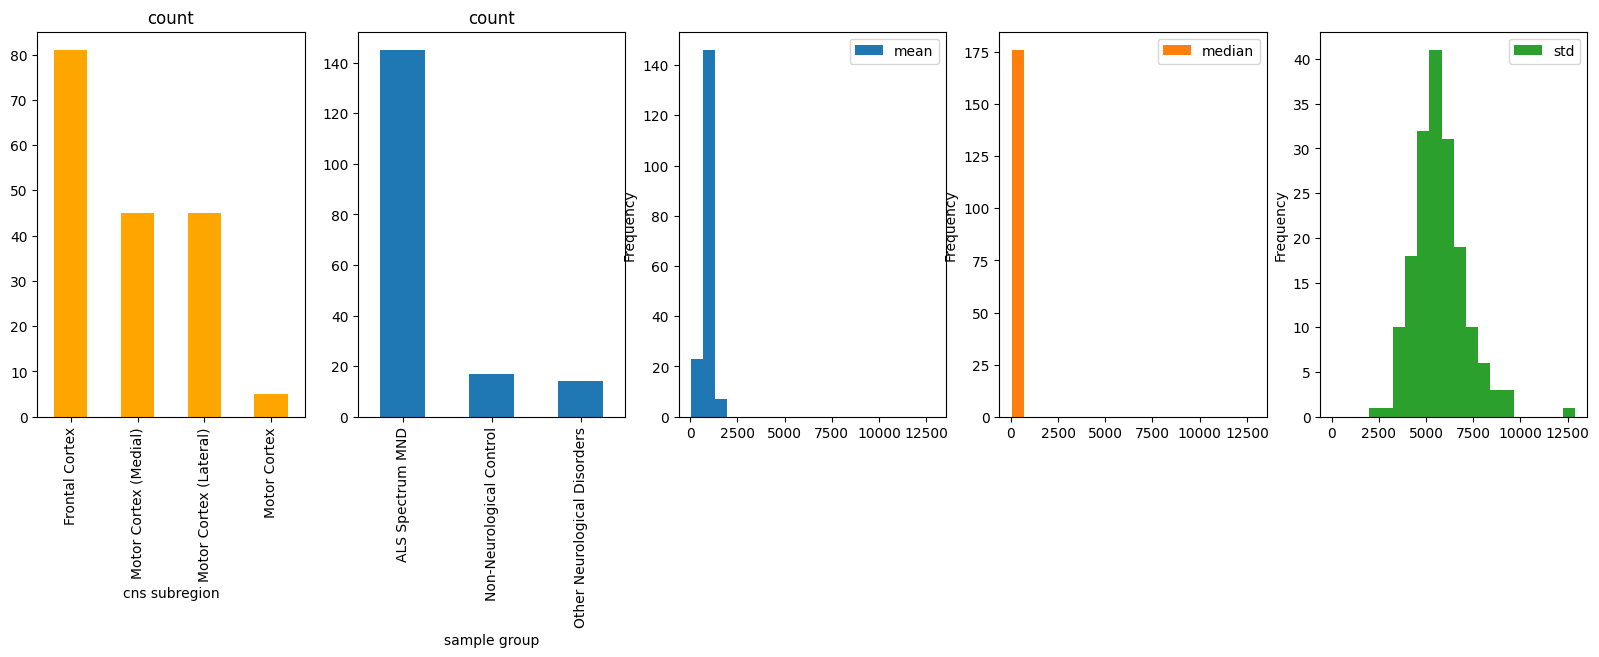

In [9]:
fig, (ax0, ax1, *axes) = plt.subplots(nrows=1,ncols=5, figsize=(20,5))

sample_source = annotations.get_annotations()['cns subregion'].value_counts().plot.bar(ax=ax0, subplots=True, color="orange")
disease_group = annotations.get_annotations()['sample group'].value_counts().plot.bar(ax=ax1, subplots=True)

descriptive_stats_by_samples = samples.get_descriptive_statistics(by_gene=False)
descriptive_stats_by_samples.plot.hist(ax=axes, subplots=True, bins=20)

plt.show()

In [26]:
samples.get_samples().mean(axis=1), samples.get_samples().median(axis=1)

(GSM3533382    1121.974994
 GSM3533252     929.513487
 GSM3533337     840.968984
 GSM3533314     731.514903
 GSM3533391     776.938521
                  ...     
 GSM3533291     930.139778
 GSM3533349     843.149207
 GSM3533339     706.542051
 GSM3533399     825.212448
 GSM3533403    1142.241288
 Length: 176, dtype: float64,
 GSM3533382    101.0
 GSM3533252     82.0
 GSM3533337     63.0
 GSM3533314     53.0
 GSM3533391     61.0
               ...  
 GSM3533291     72.0
 GSM3533349     74.0
 GSM3533339     59.0
 GSM3533399     73.0
 GSM3533403    101.0
 Length: 176, dtype: float64)

<Axes: ylabel='Frequency'>

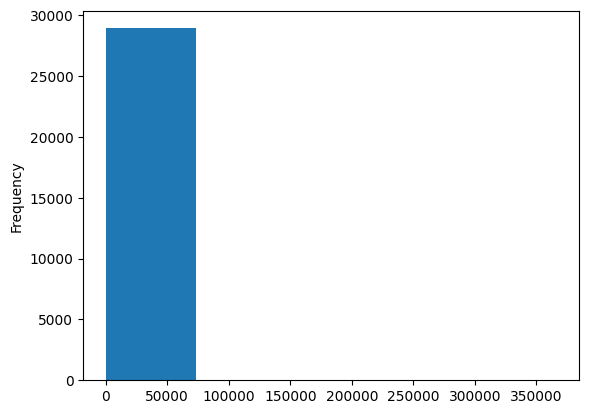

In [29]:
samples.get_samples().mean(axis=1).plot.hist(bins=20)

<Axes: ylabel='Frequency'>

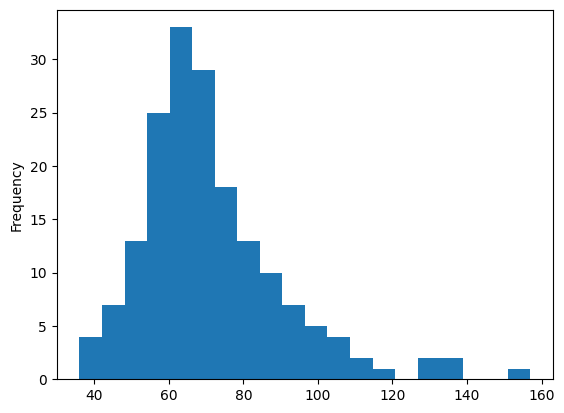

In [16]:
samples.get_samples().median(axis=1).plot.hist(bins=20)

<Axes: ylabel='Frequency'>

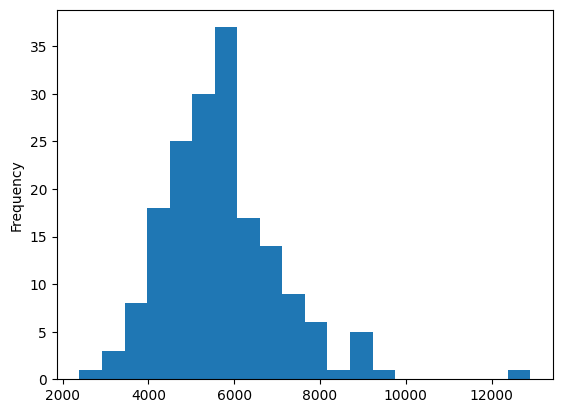

In [14]:
samples.get_samples().std(axis=1).plot.hist(bins=20)

<Axes: >

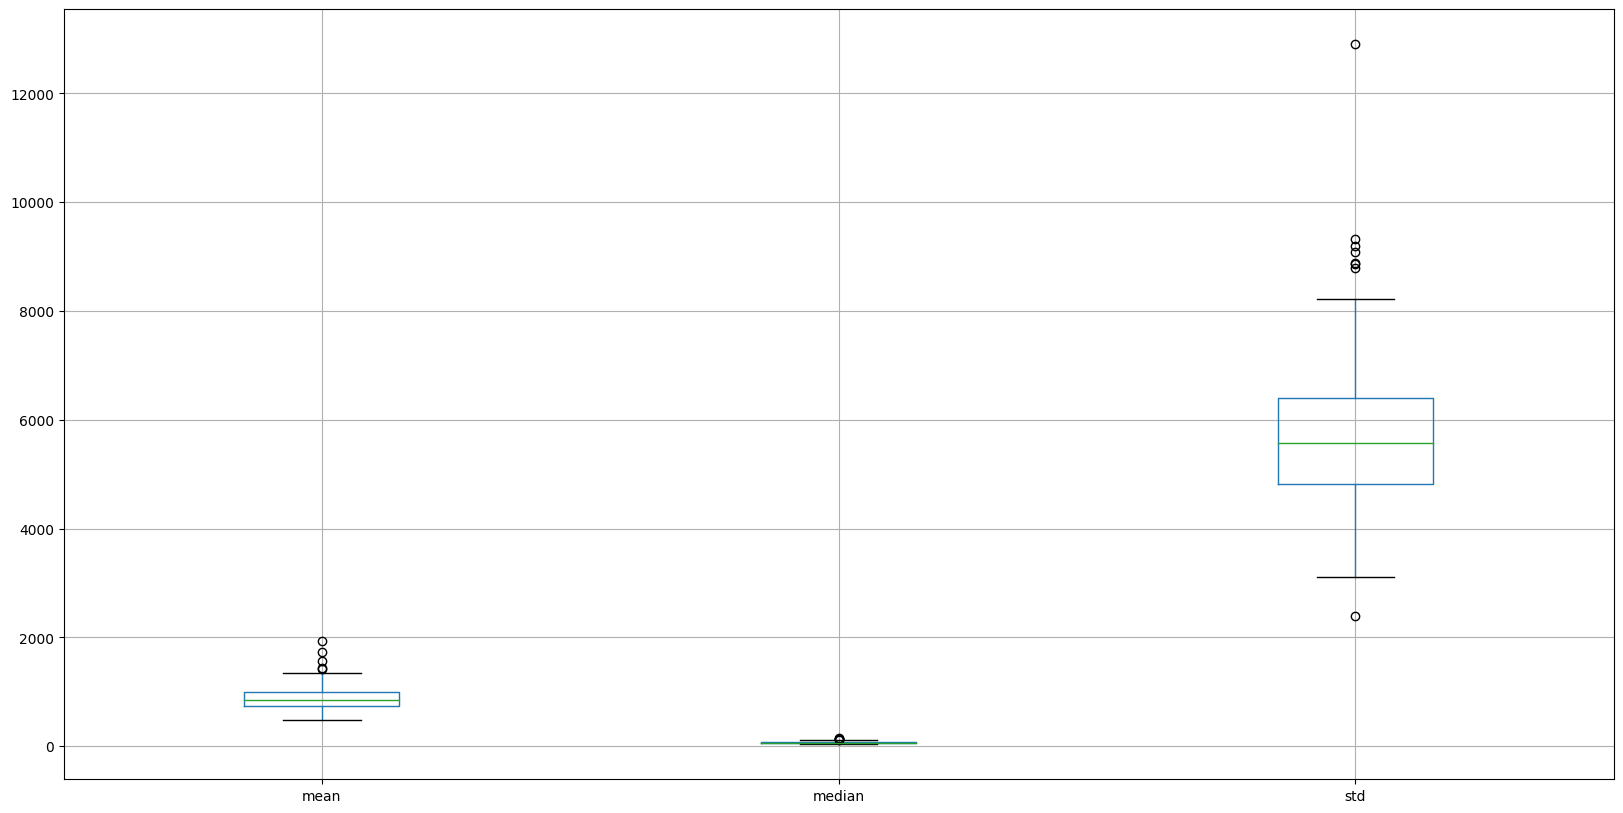

In [3]:
fig = plt.gcf()
fig.set_size_inches(20, 10)

descriptive_stats_by_samples.boxplot()

### RNA Count Description

In [36]:
descriptive_stats_by_genes

,mean,median,std
A1BG,3.665163,3.555348,3.068575
A1BG-AS1,4.783887,4.695925,3.894630
A1CF,0.157392,0.000000,0.508524
A2M,7.806454,7.735215,7.154109
A2M-AS1,4.640230,4.559126,3.598791
...,...,...,...
X8_LINE:CR1:LINE,6.139125,6.107023,4.868666
X9_LINE:L1:LINE,4.717281,4.682131,3.543782
Zaphod2:hAT-Tip100:DNA,6.032923,6.017376,4.815262
Zaphod3:hAT-Tip100:DNA,7.350279,7.354682,6.138799


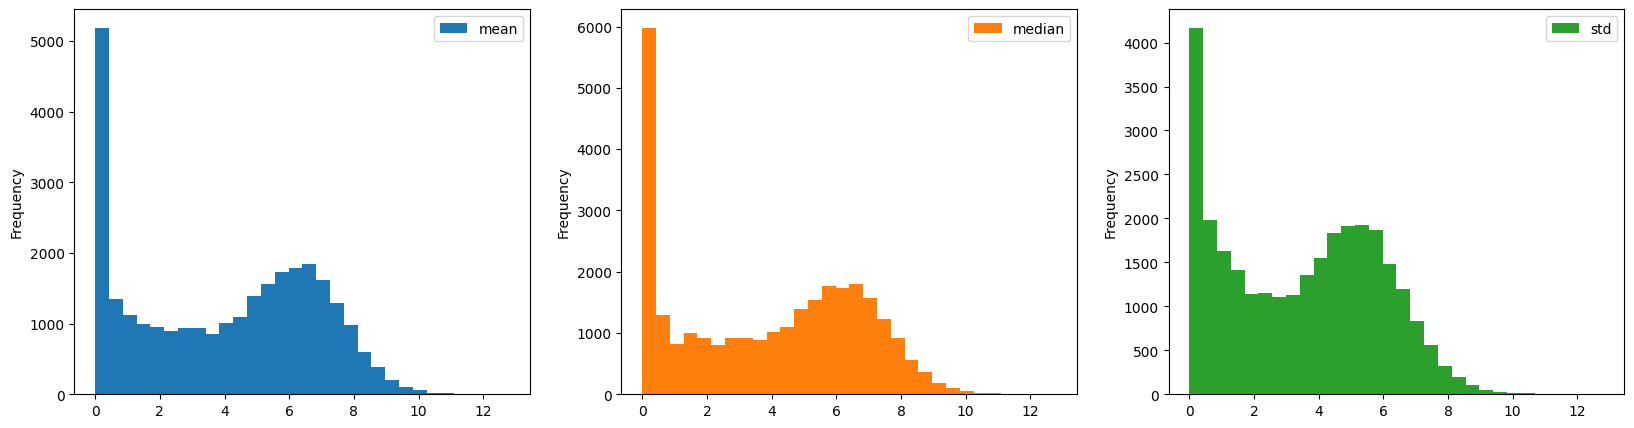

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

descriptive_stats_by_genes = samples.get_descriptive_statistics(by_gene=True)

descriptive_stats_by_genes.plot.hist(subplots=True, bins=30, ax=axes)

plt.show()

In [4]:
sam = samples.get_basic_statistics()

In [7]:
sam

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,38.062500,118.568182,0.170455,2455.403409,102.568182,131.272727,2.670455,2.573864,45.119318,0.488636,...,806.892045,1773.965909,1643.812500,901.12500,89.926136,462.647727,110.863636,415.931818,1555.630682,1735.556818
std,20.511225,48.137849,0.662835,1278.351971,35.553998,69.401396,2.448190,2.420200,36.418245,0.770815,...,231.178632,487.710159,435.815209,241.33388,27.999392,129.147228,33.597511,122.379157,462.496696,490.915096
min,10.000000,39.000000,0.000000,439.000000,31.000000,9.000000,0.000000,0.000000,2.000000,0.000000,...,288.000000,640.000000,644.000000,352.00000,30.000000,179.000000,36.000000,136.000000,614.000000,723.000000
25%,24.000000,91.750000,0.000000,1474.500000,79.000000,83.750000,1.000000,1.000000,20.000000,0.000000,...,650.500000,1466.000000,1339.750000,725.50000,71.000000,380.000000,88.000000,328.000000,1247.000000,1418.750000
50%,34.000000,108.500000,0.000000,2286.500000,94.500000,122.000000,2.000000,2.000000,34.500000,0.000000,...,808.000000,1750.000000,1626.000000,869.50000,88.000000,448.000000,107.000000,409.500000,1562.500000,1733.000000
75%,43.250000,140.250000,0.000000,3101.750000,119.500000,162.000000,4.000000,3.250000,60.000000,1.000000,...,918.500000,2018.500000,1868.500000,1034.75000,103.000000,529.500000,131.250000,479.500000,1786.250000,1979.250000
max,134.000000,341.000000,6.000000,7137.000000,227.000000,496.000000,20.000000,14.000000,225.000000,5.000000,...,1824.000000,4240.000000,3761.000000,2046.00000,235.000000,1180.000000,255.000000,954.000000,3946.000000,3902.000000


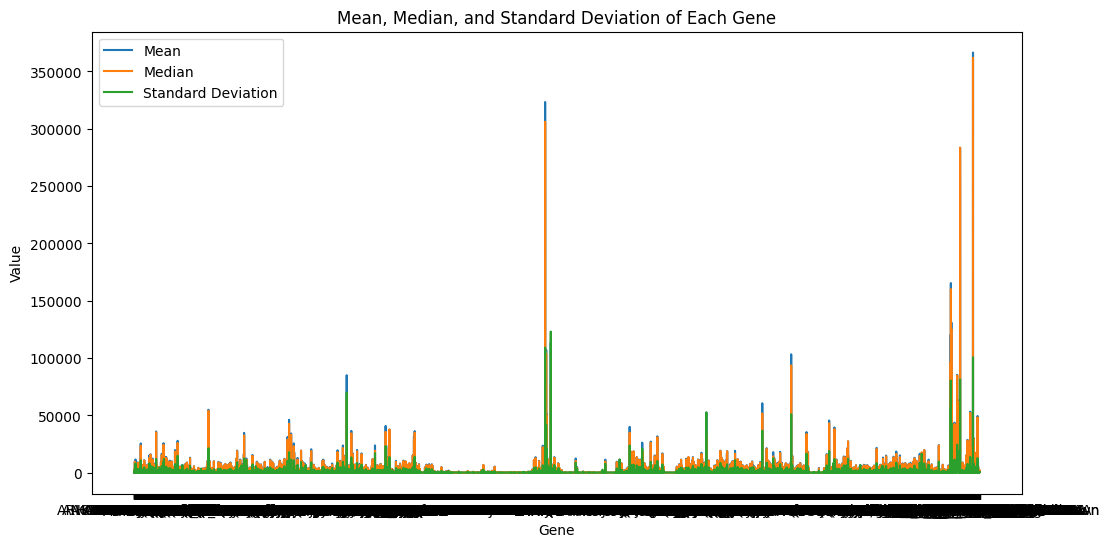

In [32]:
def get_mean_median_std() -> None:
    '''
    This method plots the mean, median and standard deviation of each gene and shows the plot.
    '''
    # mean = self.__genes_counts.mean()
    # median = self.__genes_counts.median()
    # std_dev = self.__genes_counts.std()

    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.plot(samples.get_samples().mean(), label='Mean')
    plt.plot(samples.get_samples().median(), label='Median')
    plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean, Median, and Standard Deviation of Each Gene')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return

get_mean_median_std()

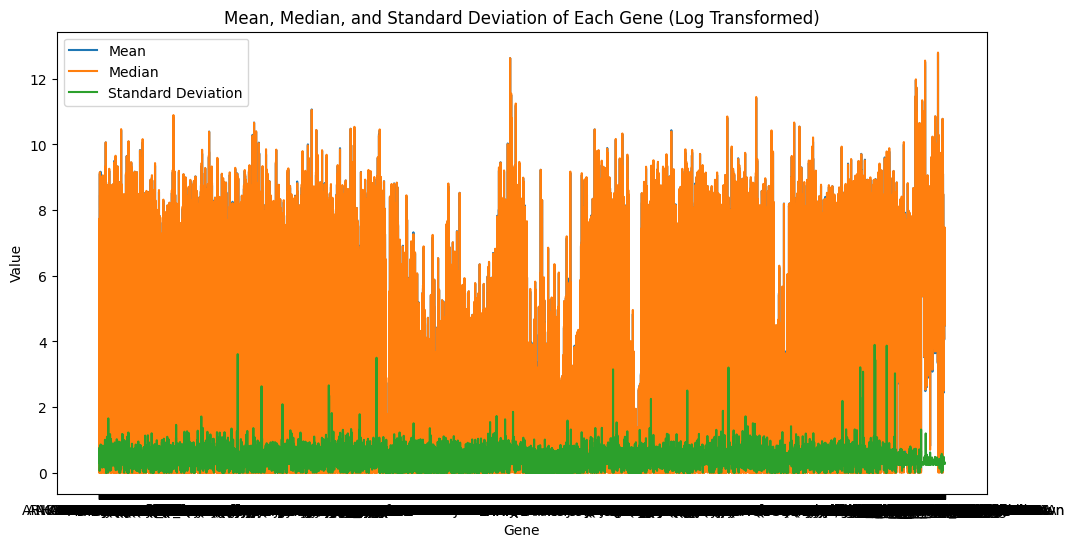

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,3.761200,5.247024,0.0,8.307213,4.532599,5.308268,0.693147,2.197225,4.343805,0.693147,...,6.931472,7.768110,7.667626,7.143618,4.615121,6.410175,4.948760,6.313548,7.727535,7.711549
GSM3533252,3.637586,4.709530,0.0,8.446985,4.634729,4.174387,2.079442,0.693147,4.234107,0.000000,...,6.781058,7.639161,7.554335,6.978214,4.787492,6.171701,4.867534,6.265301,7.507690,7.561122
GSM3533337,3.465736,4.709530,0.0,7.303170,4.442651,4.110874,0.693147,0.693147,2.564949,0.000000,...,6.487684,7.213768,7.204893,6.620073,4.127134,5.834811,4.634729,5.849325,7.023759,7.271009
GSM3533314,2.708050,3.737670,0.0,7.689829,4.663439,5.293305,1.609438,0.000000,3.218876,0.000000,...,6.865891,7.609862,7.505492,6.992096,4.605170,6.269096,4.983607,6.102559,7.328437,7.471932
GSM3533391,3.637586,4.779123,0.0,7.127694,4.653960,5.129899,0.693147,0.693147,3.091042,0.693147,...,6.742881,7.508239,7.393878,6.806829,4.574711,6.159095,4.795791,6.030685,7.350516,7.478170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,3.401197,4.962845,0.0,7.265430,4.634729,4.753590,1.098612,1.609438,2.708050,0.693147,...,6.510258,7.331060,7.185387,6.601230,4.454347,5.978886,4.532599,5.802118,7.154615,7.250636
GSM3533349,3.465736,4.962845,0.0,7.331060,4.691348,4.812184,1.098612,0.693147,4.941642,0.000000,...,6.632002,7.452982,7.362645,6.765039,4.343805,6.059123,4.812184,6.066108,7.299121,7.415175
GSM3533339,3.688879,4.564348,0.0,7.109879,4.317488,4.499810,0.693147,1.386294,3.688879,0.000000,...,6.533789,7.261927,7.201171,6.542472,4.624973,5.872118,4.430817,5.707110,7.044033,7.237778
GSM3533399,3.850148,5.192957,0.0,7.972466,4.499810,4.700480,0.693147,1.945910,3.850148,0.693147,...,6.680855,7.435438,7.305860,6.768493,4.499810,6.152733,4.605170,6.093570,7.429521,7.515889


In [30]:
import numpy as np
import pandas as pd
def log_transformation(df) -> pd.DataFrame:
    # Apply log transformation
    log_genes_counts = np.log1p(df)

    mean = log_genes_counts.mean()
    median = log_genes_counts.median()
    std_dev = log_genes_counts.std()

    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.plot(mean, label='Mean')
    plt.plot(median, label='Median')
    plt.plot(std_dev, label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean, Median, and Standard Deviation of Each Gene (Log Transformed)')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return log_genes_counts

log_transformation(samples.get_samples())

In [4]:
normalized = samples.get_normalized_genes_data()

normalized

# import pandas as pd
# normalized.describe()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,0.192516,1.467302,-0.257893,1.252512,-0.298091,1.007562,-0.684269,2.248416,0.850365,0.665299,...,0.937476,1.211200,1.134872,1.512068,0.360815,1.120923,0.869692,1.106835,1.546832,1.016189
1,-0.051949,-0.178500,-0.257893,1.729482,-0.016026,-0.972094,1.773513,-0.652158,0.630068,-0.635730,...,0.317142,0.623113,0.607921,0.710064,1.041337,0.119213,0.541353,0.893774,0.575413,0.378828
2,-0.345306,-0.178500,-0.257893,-0.762055,-0.523743,-1.029894,-0.684269,-0.652158,-0.912010,-0.635730,...,-0.654570,-0.857385,-0.687597,-0.632149,-1.036046,-0.944618,-0.264571,-0.573066,-0.940262,-0.609899
3,-1.176485,-1.615974,-0.257893,-0.212129,0.068593,0.964212,0.544622,-1.066526,-0.581565,-0.635730,...,0.655506,0.499738,0.398521,0.772396,0.324998,0.499708,1.018937,0.246398,-0.072923,0.043805
4,-0.051949,-0.011837,-0.257893,-0.949548,0.040387,0.530711,-0.684269,-0.652158,-0.664176,0.665299,...,0.173988,0.098770,-0.043289,0.007791,0.217547,0.072622,0.272712,-0.007636,0.000801,0.066276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,-0.443092,0.488154,-0.257893,-0.805202,-0.016026,-0.235142,-0.274639,0.590945,-0.856936,0.665299,...,-0.589500,-0.509879,-0.747425,-0.690326,-0.176439,-0.533063,-0.563061,-0.704180,-0.599831,-0.669141
172,-0.345306,0.488154,-0.257893,-0.729107,0.153212,-0.133991,-0.274639,-0.652158,2.585202,-0.635730,...,-0.212094,-0.102742,-0.158344,-0.145961,-0.498792,-0.276811,0.332410,0.115284,-0.168330,-0.154349
173,0.045837,-0.490995,-0.257893,-0.966807,-0.805808,-0.610843,-0.684269,0.176577,-0.168508,-0.635730,...,-0.520092,-0.719617,-0.699102,-0.864855,0.396632,-0.843671,-0.831702,-0.950019,-0.890390,-0.705912
174,0.388087,1.258973,-0.257893,0.347997,-0.382711,-0.321842,-0.684269,1.419681,0.024251,0.665299,...,-0.047250,-0.164430,-0.358540,-0.133494,-0.033171,0.049327,-0.354118,0.213619,0.278349,0.205188


In [ ]:
mean = samples.get_mean_median_std_dev()

In [4]:
sam

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,38.062500,118.568182,0.170455,2455.403409,102.568182,131.272727,2.670455,2.573864,45.119318,0.488636,...,806.892045,1773.965909,1643.812500,901.12500,89.926136,462.647727,110.863636,415.931818,1555.630682,1735.556818
std,20.511225,48.137849,0.662835,1278.351971,35.553998,69.401396,2.448190,2.420200,36.418245,0.770815,...,231.178632,487.710159,435.815209,241.33388,27.999392,129.147228,33.597511,122.379157,462.496696,490.915096
min,10.000000,39.000000,0.000000,439.000000,31.000000,9.000000,0.000000,0.000000,2.000000,0.000000,...,288.000000,640.000000,644.000000,352.00000,30.000000,179.000000,36.000000,136.000000,614.000000,723.000000
25%,24.000000,91.750000,0.000000,1474.500000,79.000000,83.750000,1.000000,1.000000,20.000000,0.000000,...,650.500000,1466.000000,1339.750000,725.50000,71.000000,380.000000,88.000000,328.000000,1247.000000,1418.750000
50%,34.000000,108.500000,0.000000,2286.500000,94.500000,122.000000,2.000000,2.000000,34.500000,0.000000,...,808.000000,1750.000000,1626.000000,869.50000,88.000000,448.000000,107.000000,409.500000,1562.500000,1733.000000
75%,43.250000,140.250000,0.000000,3101.750000,119.500000,162.000000,4.000000,3.250000,60.000000,1.000000,...,918.500000,2018.500000,1868.500000,1034.75000,103.000000,529.500000,131.250000,479.500000,1786.250000,1979.250000
max,134.000000,341.000000,6.000000,7137.000000,227.000000,496.000000,20.000000,14.000000,225.000000,5.000000,...,1824.000000,4240.000000,3761.000000,2046.00000,235.000000,1180.000000,255.000000,954.000000,3946.000000,3902.000000


## Step 3: PCA

By reducing the number of samples we can see the relationship between samples. The small number of dimensions show two components with the highest weight.
Plot the results obtained with the new dimensionality reducted data.

In [44]:
reduced_samples

,PC1,PC2
GSM3533382,102.150849,-73.081677
GSM3533252,9.872624,-4.123005
GSM3533337,-10.562617,8.534611
GSM3533314,-86.498471,25.758401
GSM3533391,-45.348866,-42.483218
...,...,...
GSM3533291,37.804882,-47.814623
GSM3533349,-20.826506,-8.182184
GSM3533339,-72.472641,32.991673
GSM3533399,-17.754342,-43.504201


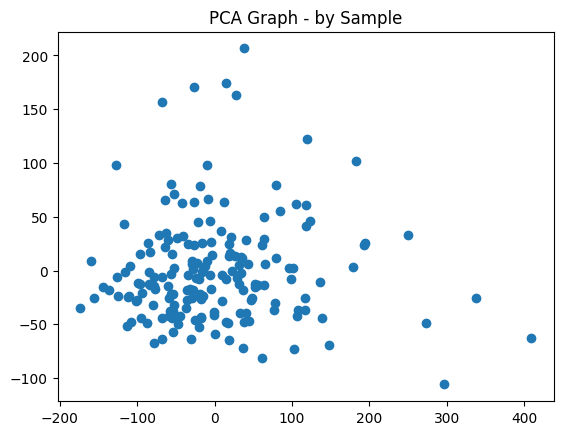

In [43]:
samples.reduce_to_2d_per_sample()

reduced_samples = samples.get_reduced_samples()

plt.scatter(reduced_samples.PC1, reduced_samples.PC2)
plt.title('PCA Graph - by Sample')

plt.show()

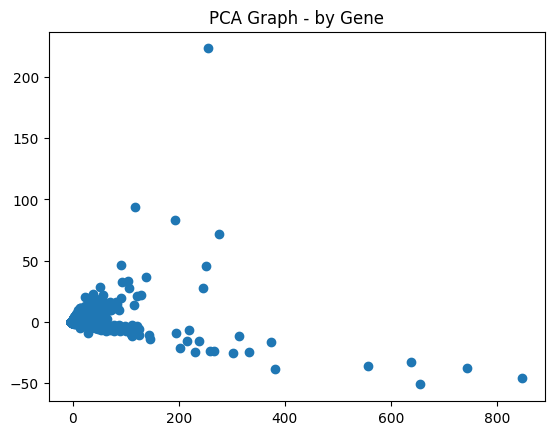

In [40]:
samples.reduce_to_2d_per_gene()

reduced_genes = samples.get_reduced_genes()

plt.scatter(reduced_genes.PC1, reduced_genes.PC2)
plt.title('PCA Graph - by Gene')

plt.show()

## Step 4: tSNE

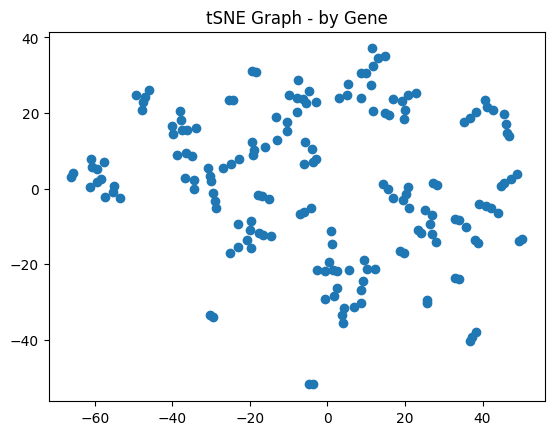

In [4]:
samples.reduce_to_2d_per_sample_tSNE()

reduced_samples = samples.get_reduced_samples_tSNE()

plt.scatter(reduced_samples[0], reduced_samples[1])
plt.title('tSNE Graph - by Gene')

plt.show()

In [5]:
samples.reduce_to_2d_per_gene_tSNE()

reduced_genes = samples.get_reduced_genes_tSNE()

plt.scatter(reduced_genes[0], reduced_genes[1])
plt.title('tSNE Graph - by Gene')

plt.show()

## Step 5: Univariate Analysis

In [48]:
annotations.get_annotations()['sample group'].value_counts()

sample group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [2]:
# als_patients = annotations.get_annotations().drop()
als_patients = annotations.get_annotations()[annotations.get_annotations()["sample group"] == "ALS Spectrum MND"]
als_patients

,cns subregion,sample group
GSM3533230,Frontal Cortex,ALS Spectrum MND
GSM3533231,Frontal Cortex,ALS Spectrum MND
GSM3533232,Frontal Cortex,ALS Spectrum MND
GSM3533233,Frontal Cortex,ALS Spectrum MND
GSM3533234,Frontal Cortex,ALS Spectrum MND
...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND
GSM3533402,Frontal Cortex,ALS Spectrum MND
GSM3533403,Frontal Cortex,ALS Spectrum MND
GSM3533404,Frontal Cortex,ALS Spectrum MND


In [3]:
healthy = annotations.get_annotations()[annotations.get_annotations()["sample group"] == "Non-Neurological Control"]
healthy

,cns subregion,sample group
GSM3533238,Frontal Cortex,Non-Neurological Control
GSM3533251,Motor Cortex (Medial),Non-Neurological Control
GSM3533259,Motor Cortex (Lateral),Non-Neurological Control
GSM3533266,Frontal Cortex,Non-Neurological Control
GSM3533272,Motor Cortex (Medial),Non-Neurological Control
GSM3533277,Motor Cortex (Lateral),Non-Neurological Control
GSM3533282,Frontal Cortex,Non-Neurological Control
GSM3533290,Motor Cortex (Medial),Non-Neurological Control
GSM3533366,Motor Cortex (Medial),Non-Neurological Control
GSM3533367,Motor Cortex (Lateral),Non-Neurological Control


In [4]:
als_patients = als_patients.merge(samples.get_samples(), left_index=True, right_index=True)
als_patients 

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533230,Frontal Cortex,ALS Spectrum MND,42,149,0,3327,101,78,4,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,25,107,2,1787,153,109,2,1,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,20,95,0,1830,121,127,1,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,22,101,0,2131,142,143,5,1,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,22,102,0,1706,83,178,1,3,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,23,113,0,2130,72,71,2,3,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,134,300,0,6077,171,42,8,5,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,64,290,0,4752,118,174,8,2,...,623,1466,1246,726,61,358,107,347,1284,1469
GSM3533404,Frontal Cortex,ALS Spectrum MND,124,332,0,3516,141,173,3,2,...,743,1846,1680,936,110,479,120,503,1646,1839


In [5]:
healthy = healthy.merge(samples.get_samples(), left_index=True, right_index=True)
healthy

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533238,Frontal Cortex,Non-Neurological Control,34,84,0,677,45,95,1,1,...,651,1317,1188,687,63,313,54,321,1330,1545
GSM3533251,Motor Cortex (Medial),Non-Neurological Control,109,154,0,2560,136,117,4,4,...,557,1437,1284,834,80,319,88,315,1032,1164
GSM3533259,Motor Cortex (Lateral),Non-Neurological Control,63,128,0,1984,76,76,2,1,...,623,1599,1448,838,57,416,78,395,1532,1604
GSM3533266,Frontal Cortex,Non-Neurological Control,37,124,0,2452,75,122,3,5,...,884,1956,1829,954,90,493,121,431,1645,1992
GSM3533272,Motor Cortex (Medial),Non-Neurological Control,74,161,0,3094,112,154,8,4,...,889,1950,2048,979,125,543,146,390,1806,1977
GSM3533277,Motor Cortex (Lateral),Non-Neurological Control,37,95,0,2847,98,164,8,6,...,873,1785,1823,887,112,545,117,377,1569,1769
GSM3533282,Frontal Cortex,Non-Neurological Control,33,140,0,2978,119,132,0,6,...,940,2077,1986,1037,102,527,144,459,1910,2065
GSM3533290,Motor Cortex (Medial),Non-Neurological Control,16,107,0,3994,88,186,2,2,...,757,1751,1444,859,74,403,101,395,1436,1606
GSM3533366,Motor Cortex (Medial),Non-Neurological Control,20,90,0,2400,90,127,1,2,...,964,2036,1853,1023,121,589,136,557,1878,2211
GSM3533367,Motor Cortex (Lateral),Non-Neurological Control,41,145,0,4651,183,205,0,4,...,1320,3122,2731,1426,125,803,184,685,2671,2619


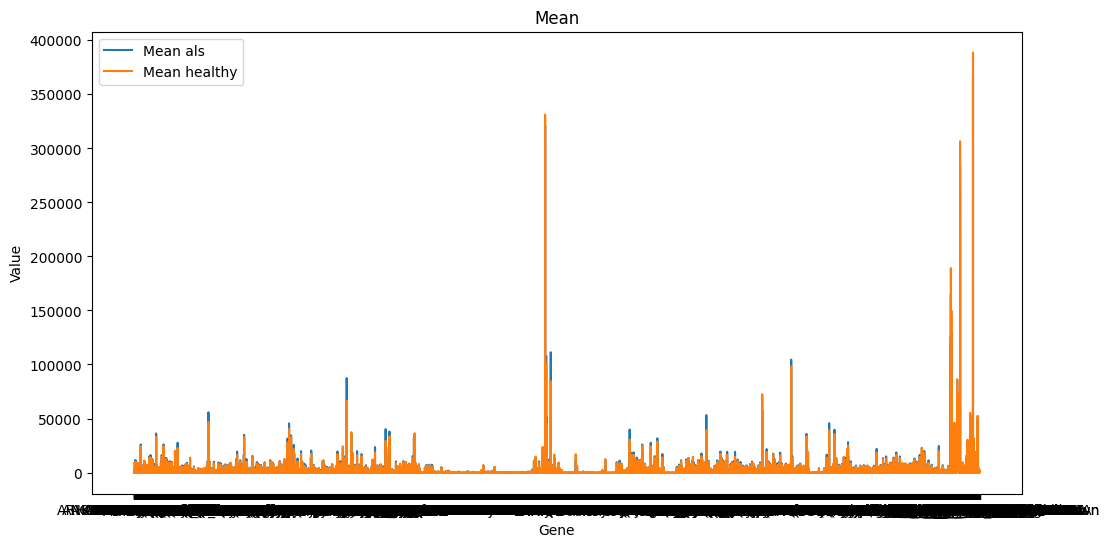

In [71]:
def compare_healthy_als(healty_patients, als_patients) -> None:
    '''
    This method plots the mean, median and standard deviation of each gene and shows the plot.
    '''
    mean_healthy = healty_patients.drop(columns=['cns subregion', 'sample group']).mean()
    mean_als = als_patients.drop(columns=['cns subregion', 'sample group']).mean()
    # mean = self.__genes_counts.mean()
    # median = self.__genes_counts.median()
    # std_dev = self.__genes_counts.std()

    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.plot(mean_als, label='Mean als')
    plt.plot(mean_healthy, label='Mean healthy')



    # plt.plot(samples.get_samples().median(), label='Median')
    # plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return

compare_healthy_als(healthy, als_patients )

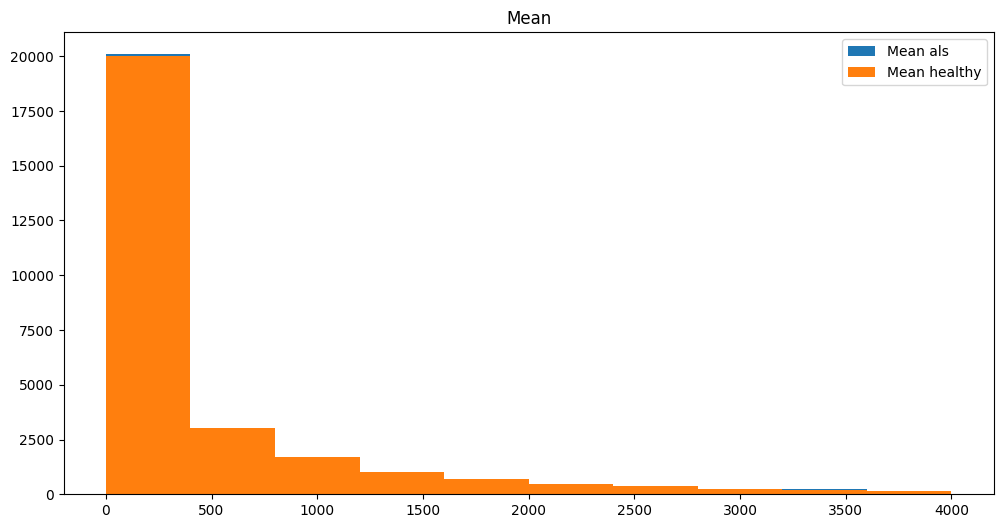

In [79]:
def compare_healthy_als_hist(healty_patients, als_patients) -> None:
    bins = 10
    mean_healthy = healty_patients.drop(columns=['cns subregion', 'sample group']).mean()
    mean_als = als_patients.drop(columns=['cns subregion', 'sample group']).mean()


    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.hist(mean_als, bins=bins, label='Mean als', range=(0, 4000))
    plt.hist(mean_healthy, bins= bins, label='Mean healthy', range=(0, 4000))



    # plt.plot(samples.get_samples().median(), label='Median')
    # plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean')
    # plt.xlabel('Gene')
    # plt.ylabel('Value')

    plt.show()
    return

compare_healthy_als_hist(healthy, als_patients )

In [8]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet


count_data = pd.concat([healthy, als_patients])

condition_data = ['healthy'] * len(healthy) + ['als'] * len(als_patients)

dds = DeseqDataSet(countData=count_data,
               designMatrix=condition_data,
               design_formula="~ condition",
               gene_column='gene')

dds.run_deseq()
dds.get_deseq_result()

res = dds.deseq_result 

TypeError: __init__() got an unexpected keyword argument 'countData'